# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: DKstat_bykoder.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020


In [17]:
import numpy as np

file_path = "../../data/befkbhalderstatkode.csv"
data = np.genfromtxt(file_path, delimiter=",", dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

#print(data)

year_mask = data[:,0] == 2015

def get_pop_per_neighb(n):
    # creates mask for neighbourhood. uses mask.
    people_in_neighb = data[(data[:,1] == n) & year_mask]
    # gets pop. sums.
    return people_in_neighb[:,4].sum()

pop_per_neighb = np.array([get_pop_per_neighb(n) for n in neighb.keys()])
# print(pop_per_neighb)

# we don't have the key to the neighbourhood, but the indices between our pop array and the dict keys match
# so we can get the key using our index, and then get the neighbourhood using the key
# list of the neighb keys
neighb_keys = list(neighb.keys())
for i, p in enumerate(pop_per_neighb):
    print(neighb[neighb_keys[i]], p)
    
# really, the indices also match with a list of the values, so we could've skipped the getting key part

Indre By 51937
Østerbro 75113
Nørrebro 78802
Vesterbro/Kgs. Enghave 61623
Valby 51727
Vanløse 39537
Brønshøj-Husum 43908
Bispebjerg 53604
Amager Øst 55205
Amager Vest 64967
Udenfor 3872


In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


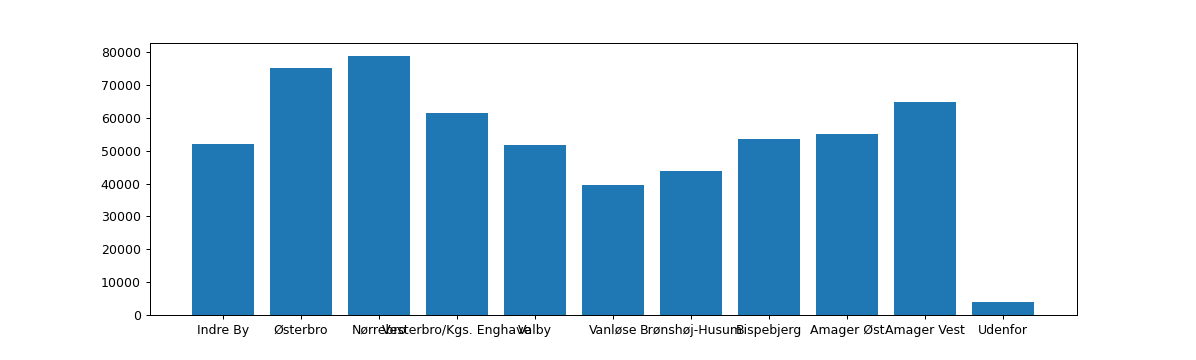

<BarContainer object of 11 artists>

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.
plt.bar(neighb.values(), pop_per_neighb)